# Color legend

In [1]:
import os,sys,inspect
pwdpath = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# sys.path.insert(0, pwdpath)
from pathlib import Path
sys.path.insert(0, str(Path(pwdpath).parent))
sys.path.insert(0, str(Path(pwdpath).parent / 'train'))

from util.utils_dataset import get_color_encoding, color_dict_to_text_color_lists

# color_dict = get_color_encoding('openrooms')


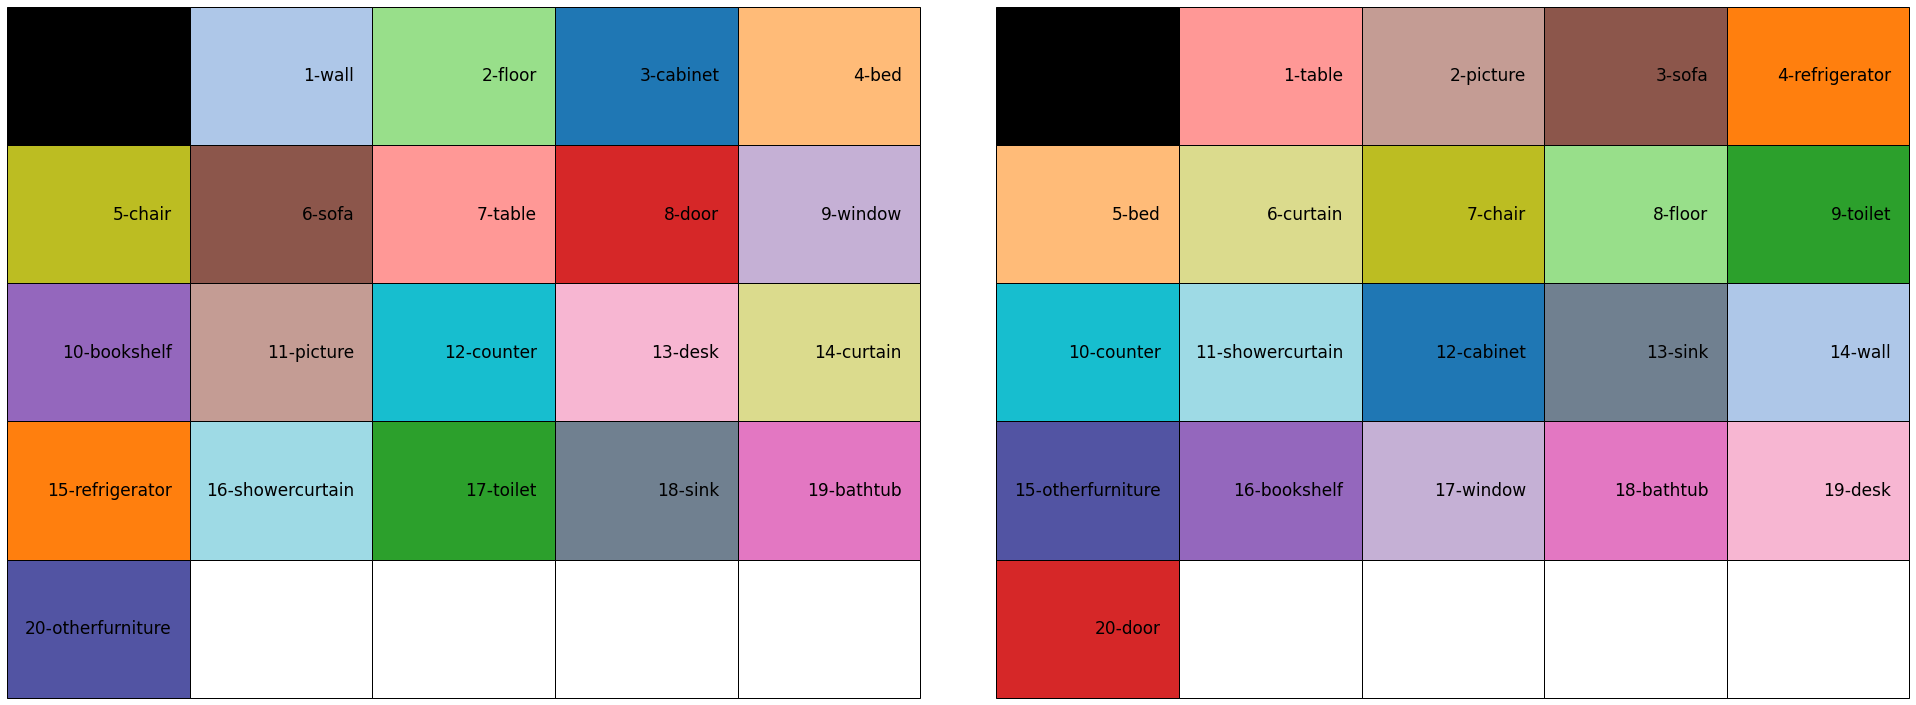

In [4]:
import colorsys
import collections
import matplotlib.pyplot as plt

# dataset_name = 'openrooms'
# dataset_name = 'InteriorNet'
dataset_name = 'scannet'

font_size = 150

fig = plt.figure(figsize=(30, 10))
ax = plt.subplot(121)
color_dict = get_color_encoding(dataset_name)
text_list, color_list = color_dict_to_text_color_lists(color_dict)

plt.axis('tight')
plt.axis('off')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0., 0.0, 1.2, 1.2])
the_table.set_fontsize(font_size)
the_table.scale(1.5, 6)
# ax.title.set_text('sort by label IDs')

ax = plt.subplot(122)
# ax.title.set_text('sort by colors')

color_dict = get_color_encoding(dataset_name)
color_dict = collections.OrderedDict({k: v for k, v in sorted(color_dict.items(), key=lambda item: colorsys.rgb_to_hsv(item[1][0], item[1][1], item[1][2]))})
text_list, color_list = color_dict_to_text_color_lists(color_dict)

plt.axis('tight')
plt.axis('off')
# ax.title.set_text('Sorted by label')
the_table = ax.table(cellText=text_list, cellColours=color_list, bbox=[0.1, 0.0, 1.2, 1.2])
the_table.set_fontsize(font_size)
the_table.scale(1.5, 6)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

plt.show()

fig.savefig('data/%s/color_mapping.png'%dataset_name, bbox_inches='tight')

In [16]:
import random

list_a = [1, 2, 3, 4, 5, 31, 412, 11, 0]
index_list = range(len(list_a))
sample_num = len(index_list)
# index_sample = random.sample(index_list, sample_num)
random.sample(list_a, 4)


[5, 412, 3, 31]

In [3]:

index_sample

[4, 0, 6, 2, 8, 7, 5, 3, 1]

In [2]:
import numpy as np
nyu_or_dict = {0:255, 1:40, 2:41, 3:24, 4:15, 5:18, 6:8, 7:4, 8:38, 9: 27,
        10:7, 11:255, 12:4, 13:255, 14:4, 15:7, 16:1, 17: 255, 18:13, 19:255,
        20: 255, 21:255, 22:42, 23: 255, 24: 255, 25:20, 26: 255, 27: 18, 28: 255, 29: 255,
        30:255, 31:255, 32:255, 33:255, 34:32, 35:28, 36: 21, 37:33, 38:5, 39:3, 40:6}
nyu_or_map = lambda x: nyu_or_dict.get(x+1,x)

nyu_or_map = np.vectorize(nyu_or_map)

In [26]:
nyu_or_map(np.zeros((2, 2)))

array([[40, 40],
       [40, 40]])

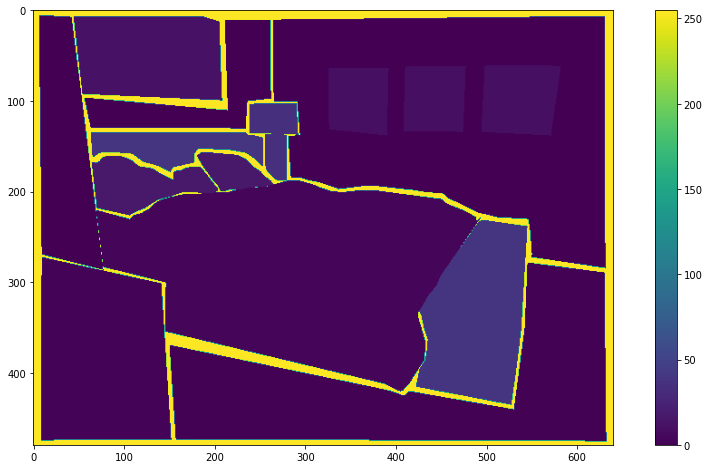

In [7]:
from PIL import Image
label_path = '../dataset/nyu/seg40/train/01017.png'
label = np.array(Image.open(label_path).convert('L'))
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.imshow(label)
plt.colorbar()
plt.show()

In [8]:
label.shape

(480, 640)